# **Digital Signal Processing - Homework Assignment 2**

### **Task 1 part a**


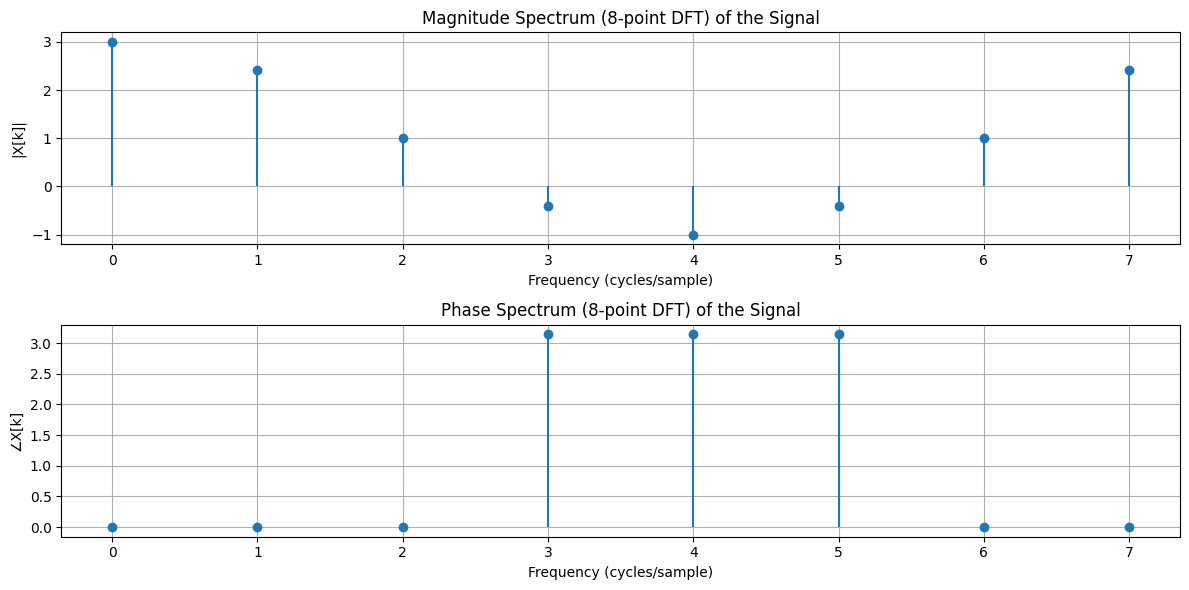

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the discrete signal
x = np.array([1, 1, 0, 0, 0, 0, 0, 1])

# Compute the 8-point DFT using NumPy's FFT function
X = np.fft.fft(x)


# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(X, basefmt=" ", use_line_collection=True)
plt.title('Magnitude Spectrum (8-point DFT) of the Signal')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('|X[k]|')
plt.grid(True)

# Plot the phase spectrum
plt.subplot(2, 1, 2)
plt.stem(np.angle(X), basefmt=" ", use_line_collection=True)
plt.title('Phase Spectrum (8-point DFT) of the Signal')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('∠X[k]')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Task 1 part b**

As can be seen from the below pictures, that DTFT of the given sequence is continious, and the DFT is achieved by sampling the DTFT to 8 samples. The sampled DTFT is similar to that shown in task a.

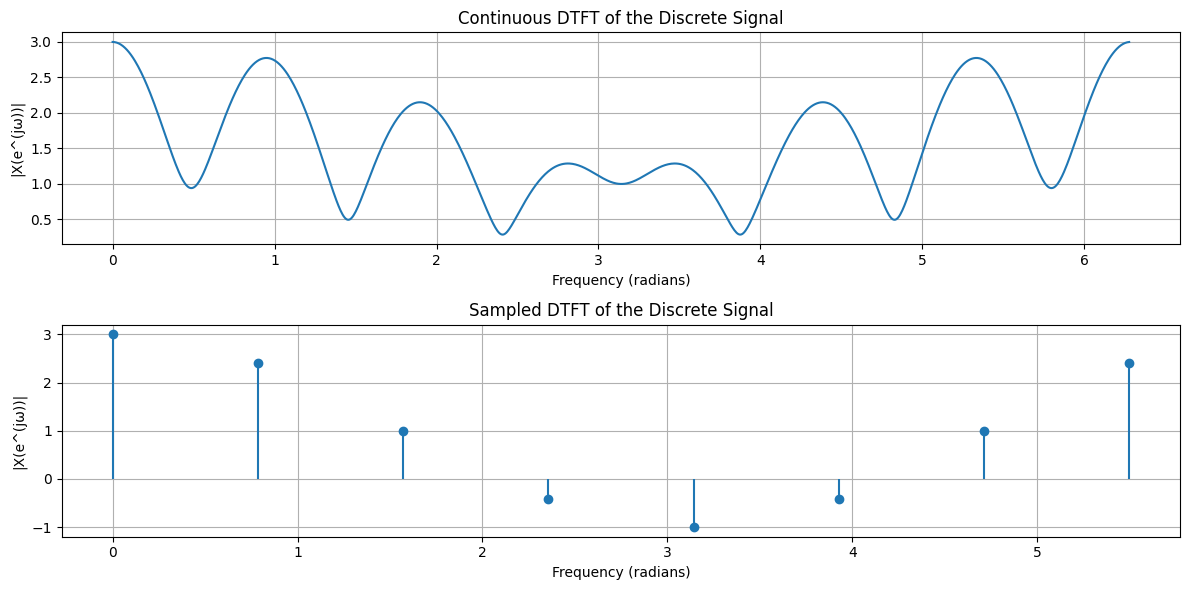

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def compute_dtft(x, omega):
    N = len(x)
    X = np.zeros_like(omega, dtype=np.complex128)

    for n in range(N):
        X += x[n] * np.exp(-1j * omega * n)

    return X

# Discrete signal
x = np.array([1, 1, 0, 0, 0, 0, 0, 1])

# Compute the DTFT of the discrete signal
num_points = 1000  # Number of points on the frequency axis
omega_continuous = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
X_continuous = compute_dtft(x, omega_continuous)

# Sample the DTFT at 8 points (same as the length of the signal)
omega_samples = np.arange(0, 2 * np.pi, 2 * np.pi / len(x))
X_samples = compute_dtft(x, omega_samples)

# Plot the continuous and sampled DTFTs
plt.figure(figsize=(12, 6))

# Plot the continuous DTFT
plt.subplot(2, 1, 1)
plt.plot(omega_continuous, np.abs(X_continuous))
plt.title('Continuous DTFT of the Discrete Signal')
plt.xlabel('Frequency (radians)')
plt.ylabel('|X(e^(jω))|')
plt.grid(True)

# Plot the sampled DTFT
plt.subplot(2, 1, 2)
plt.stem(omega_samples, X_samples, basefmt=" ", use_line_collection=True)
plt.title('Sampled DTFT of the Discrete Signal')
plt.xlabel('Frequency (radians)')
plt.ylabel('|X(e^(jω))|')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Task 1 part c**

According to the circular convolution property of DFT $x[k] ⊛ h[k] ⇆ X[μ].H[μ]$
, multiplication of DFTs of two sequences is equivalent to circular convoluation of the same sequences in time domain. Therfore, it is not required to compute the inverse DFT of $Y[u] = X[u].H[u]$ to solve this problem. It can be solved just by circular convolution of the two sequences.

$$
x[k] ⊛ h[k] = \sum_{n=0}^{N-1} x[n].h[k-n])
$$

Actual Sequence:  [1 1 0 0 0 0 0 1]
Result of Circular Convolution: [1. 1. 1. 0. 0. 0. 0. 0.]


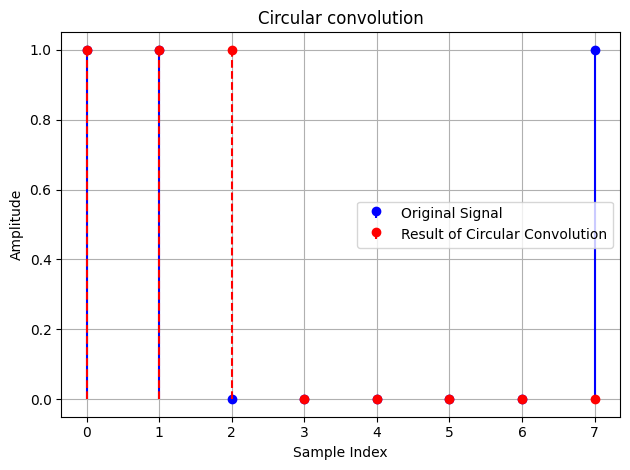

In [22]:
def circular_convolution(x, h):
    N = len(x)
    result = np.zeros(N)

    for k in range(N):
        for n in range(N):
            result[k] += x[n] * h[(k - n) % N]

    return result

# Example: Two 8-point sequences
x = np.array([1, 1, 0, 0, 0, 0, 0, 1])
h = np.array([0, 1, 0, 0, 0, 0, 0, 0])

# Perform circular convolution
result = circular_convolution(x, h)

print("Actual Sequence: ", x)
print("Result of Circular Convolution:", result)
plt.stem(x, linefmt='b-', markerfmt='bo', label='Original Signal', basefmt=" ", use_line_collection=True)
plt.stem(result, linefmt='r--', markerfmt='ro', label='Result of Circular Convolution', basefmt=" ", use_line_collection=True)
plt.title('Circular convolution')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Task 2**

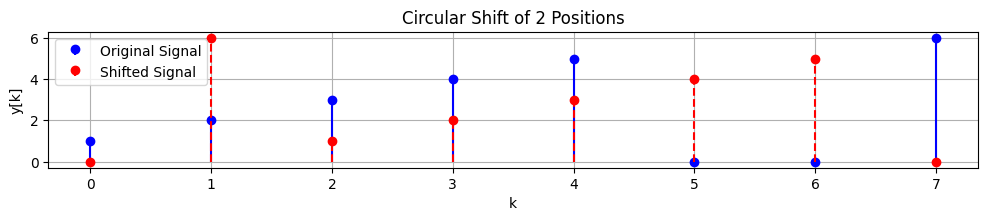

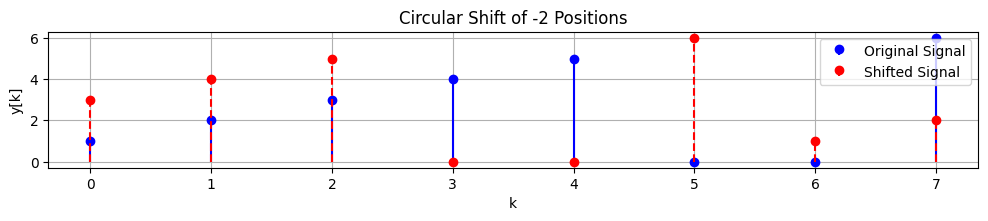

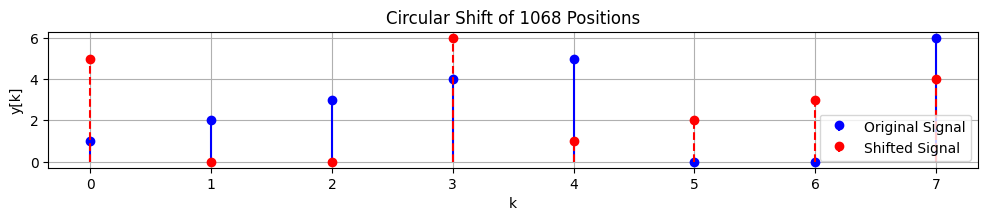

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def circular_shift(signal, shift):
    N = len(signal)
    return np.roll(signal, shift % N)

# Define the original discrete signal
x_original = np.array([1, 2, 3, 4, 5, 0, 0, 6])

# Specify the number of positions to shift
shift_amount_1 = 2
shift_amount_2 = -2
shift_amount_3 = 1068


# Perform circular shift
x_shifted = circular_shift(x_original, shift_amount_1)

plt.figure(figsize=(12, 6))
# Plot the original and shifted signals
plt.subplot(3,1,1)
plt.stem(x_original, linefmt='b-', markerfmt='bo', label='Original Signal', basefmt=" ", use_line_collection=True)
plt.stem(x_shifted, linefmt='r--', markerfmt='ro', label='Shifted Signal', basefmt=" ", use_line_collection=True)
plt.title(f'Circular Shift of {shift_amount_1} Positions')
plt.xlabel('k')
plt.ylabel('y[k]')
plt.legend()
plt.grid(True)
plt.show()

# Perform circular shift
x_shifted = circular_shift(x_original, shift_amount_2)

plt.figure(figsize=(12, 6))
# Plot the original and shifted signals
plt.subplot(3,1,2)
plt.stem(x_original, linefmt='b-', markerfmt='bo', label='Original Signal', basefmt=" ", use_line_collection=True)
plt.stem(x_shifted, linefmt='r--', markerfmt='ro', label='Shifted Signal', basefmt=" ", use_line_collection=True)
plt.title(f'Circular Shift of {shift_amount_2} Positions')
plt.xlabel('k')
plt.ylabel('y[k]')
plt.legend()
plt.grid(True)
plt.show()


# Perform circular shift
x_shifted = circular_shift(x_original, shift_amount_3)

plt.figure(figsize=(12, 6))
# Plot the original and shifted signals
plt.subplot(3,1,3)
plt.stem(x_original, linefmt='b-', markerfmt='bo', label='Original Signal', basefmt=" ", use_line_collection=True)
plt.stem(x_shifted, linefmt='r--', markerfmt='ro', label='Shifted Signal', basefmt=" ", use_line_collection=True)
plt.title(f'Circular Shift of {shift_amount_3} Positions')
plt.xlabel('k')
plt.ylabel('y[k]')
plt.legend()
plt.grid(True)
plt.show()


### **Task 3**

According to the cyclic convolution property: $x[k] ⊛ h[k] ⇆ X[μ].H[μ]$

The given DFTs $X[μ]$ and $H[μ]$ are multiplied to achieve $Y[μ]$; then inverse DFT of $Y[μ]$ is computed to achieve $y[k]$


In [25]:
import numpy as np

# Given DFT spectra X[μ] and H[μ]
x = np.array([4, 3, -1, 3])
h = np.array([0, 2j, 5, -2j])   #padding zero in the beginning of the sequence
# Compute the product of the DFTs
Y = np.multiply(x,h)

# Perform the Inverse DFT
y = np.fft.ifft(Y)

# Display the result
print("Cyclic Convolution Result:", y)

Cyclic Convolution Result: [-1.25+0.j -1.75+0.j -1.25+0.j  4.25+0.j]


**Task 4**

The DFT of the sequence $x[k]$ is given as follows:

$X[μ ]= δ[μ]+2δ[μ−1]+3δ[μ−2]+4δ[μ−3]$.

According to frequency shifting property of the DFT, if a sequence is multiplied by a complex exponential in time domain, then the DFT of the resulting sequence circularly shifted such that:

$x(k)e^{\frac{jk2πm}{N}} = X(μ-m)$

Where "m" denotes the circular shift. In the given task, the multiplication with the complex exponential is given as:

$y(k)=x(k)e^{-j1.5kπ} =x(k)e^{\frac{jk2π(-3)}{4}}$

Therefore, $Y[μ]$ will be a circularly shifted version of the original $X[μ]$ by -3 postions. This is proved by actually computing $Y[μ]$ in the code below.


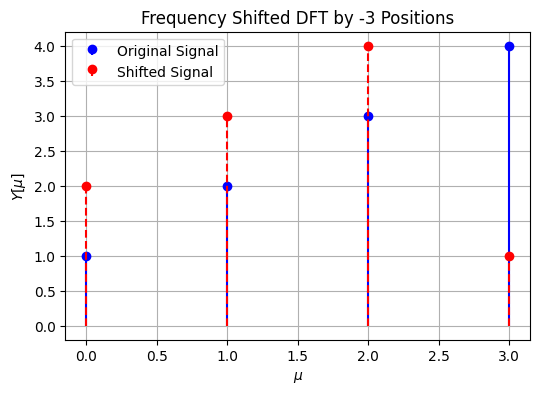

In [28]:
X = np.array([1,2,3,4])
x = np.fft.fft(X)
k = np.arange(len(X))
y = x*np.exp(-1.5j*np.pi*k)
Y = np.fft.ifft(y)
plt.figure(figsize=(6, 4))
plt.stem(X, linefmt='b-', label='Original Signal', basefmt=" ", use_line_collection=True)
plt.stem(Y, linefmt='r--', markerfmt='ro', label='Shifted Signal', basefmt=" ", use_line_collection=True)
plt.title(f'Frequency Shifted DFT by {-3} Positions')
plt.xlabel('$\mu$')
plt.ylabel('$Y[\mu]$')
plt.legend()
plt.grid(True)
plt.show()